<a href="https://colab.research.google.com/github/BHARATJHAWAR52/Hamoye-DS/blob/main/Hamoye_StageE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
file_path = '/content/drive/MyDrive/Dataset/household_power_consumption.txt'

with open(file_path, 'r') as file:
    content = file.read()

# print(content)

In [164]:
import pandas as pd

input_file_path = '/content/drive/MyDrive/Dataset/household_power_consumption.txt'
output_csv_path = 'household_power_consumption.csv'

# the file is semicolon-separated (if it's a different delimiter, adjust the sep parameter)
df = pd.read_csv(input_file_path, sep=';')

# Save DataFrame as CSV
df.to_csv(output_csv_path, index=False)


<ipython-input-164-1a81addbf0a1>:7: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path, sep=';')


In [165]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [167]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [168]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [169]:
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"])

<ipython-input-169-9a7925381dfd>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 142.5+ MB


In [171]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')



In [172]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 142.5 MB


In [174]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,2023-12-05 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,2023-12-05 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,2023-12-05 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,2023-12-05 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,2023-12-05 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,2023-12-05 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,2023-12-05 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,2023-12-05 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,2023-12-05 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [175]:
df_copy=df.copy()
df_copy_ffill = df_copy.fillna(method='ffill')
df=df_copy_ffill
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

<ipython-input-216-edc4ba39a312>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_data = df.resample('H').sum()


<Axes: title={'center': 'Hourly Global Active Power Over Time'}, xlabel='Date', ylabel='Global Active Power'>

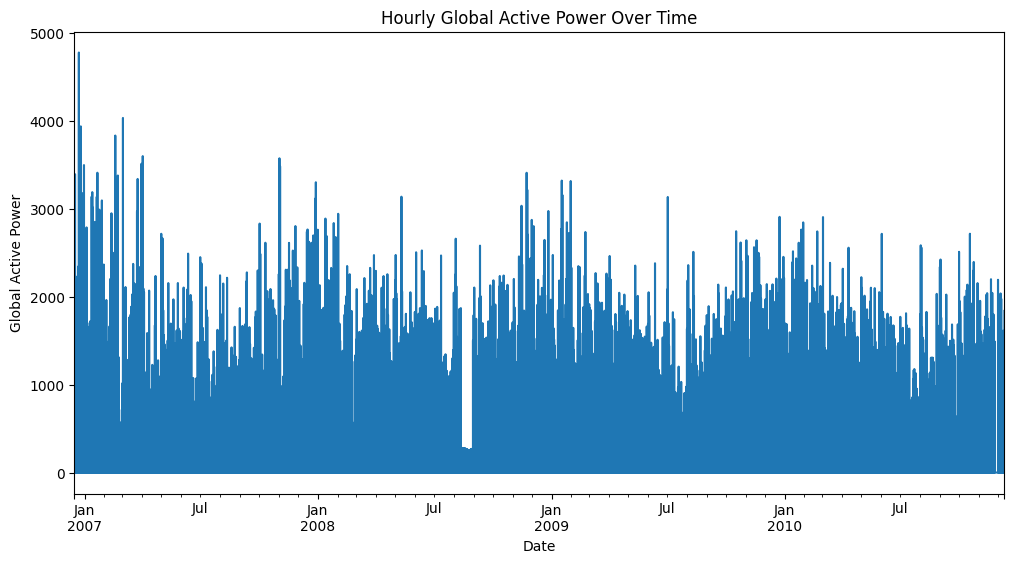

In [216]:
#question 11 already done the forward fill

# df.set_index('Date', inplace=True)

hourly_data = df.resample('H').sum()

hourly_data['Global_active_power'].plot(figsize=(12, 6), title='Hourly Global Active Power Over Time', xlabel='Date', ylabel='Global Active Power')

In [236]:
# # question 12

# from scipy.stats import pearsonr
# correlation_coefficient = pearsonr(df['Global_active_power'], df['Voltage'])
# print(f"Pearson Correlation Coefficient: {correlation_coefficient:.3f}")

In [197]:
#downsampling

downsample = df[['Date',
                 'Time',
                 'Global_active_power',
                 'Global_reactive_power',
                 'Voltage',
                 'Global_intensity',
                 'Sub_metering_1',
                 'Sub_metering_2',
                 'Sub_metering_3'
                ]].resample('D', on='Date').agg({'Time': 'first','Global_active_power': 'sum', 'Global_reactive_power': 'sum', 'Voltage': 'sum', 'Global_intensity': 'sum', 'Sub_metering_1': 'sum', 'Sub_metering_2': 'sum', 'Sub_metering_3': 'sum'}).reset_index(drop=False)

df1= downsample.copy()
df1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,2023-12-05 17:24:00,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,2023-12-05 00:00:00,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2023-12-05 00:00:00,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,2023-12-05 00:00:00,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2023-12-05 00:00:00,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...,...
1452,2010-12-07,2023-12-05 00:00:00,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,2023-12-05 00:00:00,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,2023-12-05 00:00:00,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,2023-12-05 00:00:00,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [198]:
# #Filling missing data by imputation - Forward fill
df_copy=df1.copy()
df_copy_ffill = df_copy.fillna(method='ffill')
df1=df_copy_ffill
df1.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [199]:
df1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,2023-12-05 17:24:00,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,2023-12-05 00:00:00,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2023-12-05 00:00:00,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,2023-12-05 00:00:00,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2023-12-05 00:00:00,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...,...
1452,2010-12-07,2023-12-05 00:00:00,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,2023-12-05 00:00:00,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,2023-12-05 00:00:00,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,2023-12-05 00:00:00,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


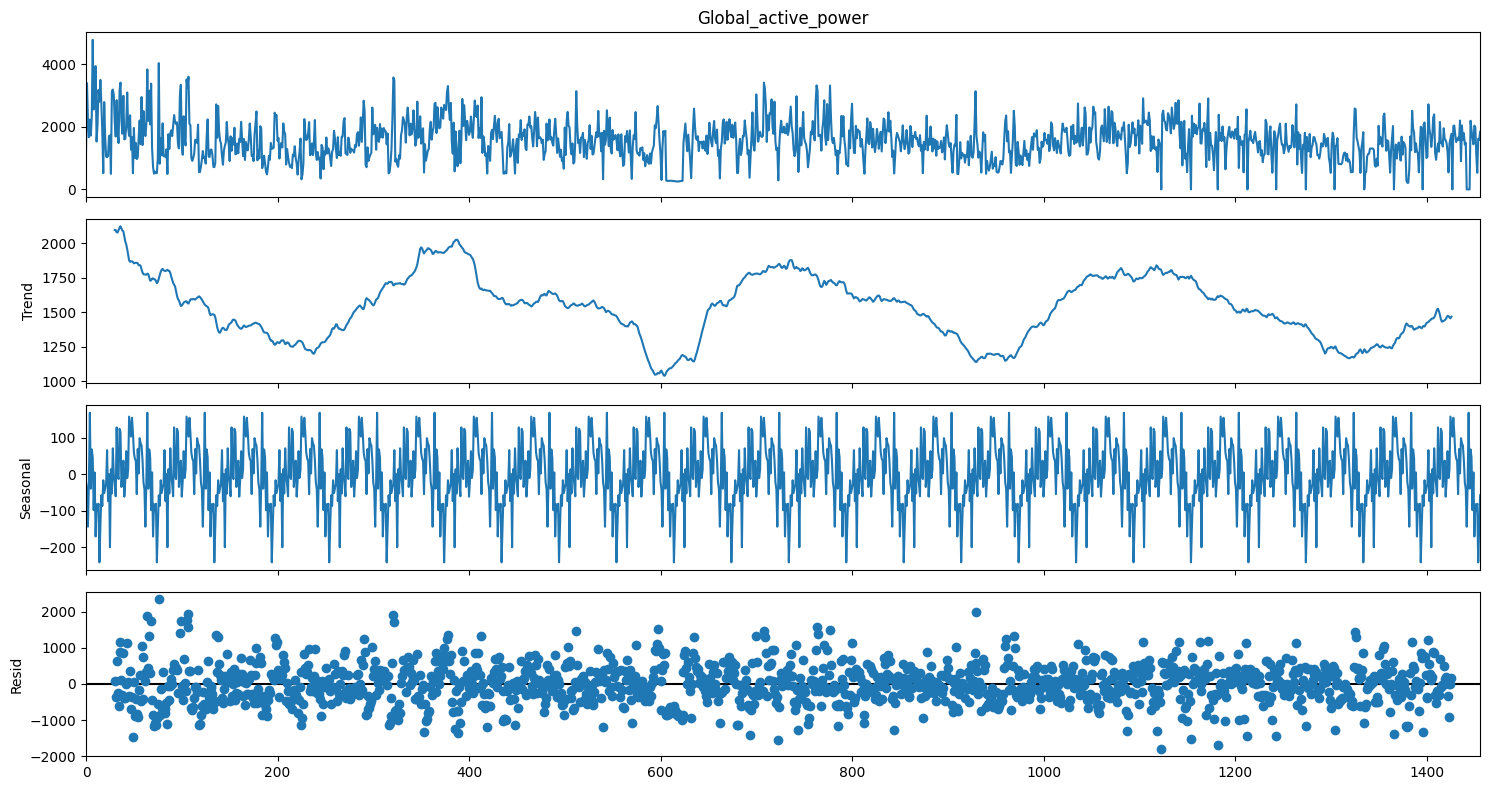

In [200]:
import matplotlib.pyplot as plt

import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df1['Global_active_power'], model='additive',period=60)
decompose_series.plot()
plt.show()

In [201]:
df1.rename(columns={'Date': 'ds', 'Global_active_power': 'y','Global_reactive_power':'add1','Voltage':'add2','Global_intensity':'add3','Sub_metering_1':'add4','Sub_metering_2':'add5','Sub_metering_3':'add6'}, inplace=True)
df1

,ds,Time,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,2023-12-05 17:24:00,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,2023-12-05 00:00:00,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2023-12-05 00:00:00,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,2023-12-05 00:00:00,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2023-12-05 00:00:00,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...,...
1452,2010-12-07,2023-12-05 00:00:00,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,2023-12-05 00:00:00,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,2023-12-05 00:00:00,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,2023-12-05 00:00:00,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [202]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df1['y'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -8.730466104846856
p-value: 3.201990867649428e-14
No. of lags used: 8
No. of observations used : 1448
Critical Values:
   1%: -3.434874123222469
   5%: -2.8635380960841084
   10%: -2.5678337706609993


In [203]:
df_uni = df1[["ds", "y"]]
df_uni

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1452,2010-12-07,1109.574
1453,2010-12-08,529.698
1454,2010-12-09,1612.092
1455,2010-12-10,1579.692


In [204]:
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1457 non-null   datetime64[ns]
 1   y       1457 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.9 KB


In [205]:
from prophet import Prophet
import prophet

In [206]:
split_index = len(df1) - 300

train = df_uni.iloc[:split_index]
test = df_uni.iloc[split_index:]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpij73dq_9/ibdhab0m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpij73dq_9/fnyl2t0b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24505', 'data', 'file=/tmp/tmpij73dq_9/ibdhab0m.json', 'init=/tmp/tmpij73dq_9/fnyl2t0b.json', 'output', 'file=/tmp/tmpij73dq_9/prophet_modelwuq_f7vy/prophet_model-20231205215546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:55:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


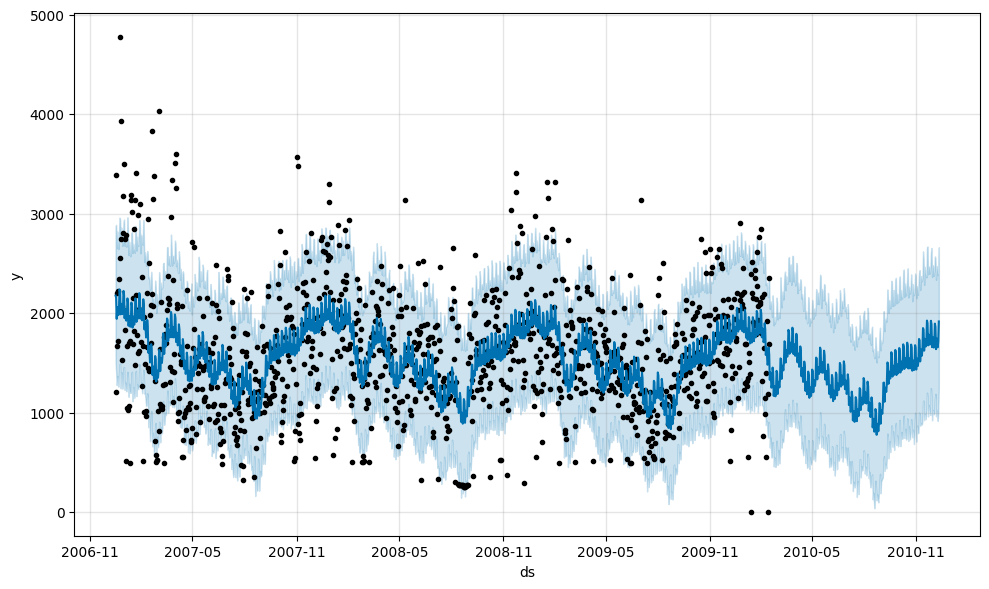

In [229]:
model = Prophet()
model.fit(train)

#predict for the next 10 months
future = model.make_future_dataframe(periods=300, freq='D')
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
predicted_values = forecast.iloc[split_index:]['yhat'].values

model.plot(forecast)
plt.show()

In [234]:
#question 14
test['absolute_percentage_error'] = abs((test['y'].values - predicted_values) / test['y'].values) * 100
mape = test['absolute_percentage_error'].mean()

# Print MAPE to 2 decimal places
print(f"MAPE: {mape:.2f}%")

MAPE: inf%


<ipython-input-234-73621b11ca58>:2: RuntimeWarning: divide by zero encountered in divide
  test['absolute_percentage_error'] = abs((test['y'].values - predicted_values) / test['y'].values) * 100
<ipython-input-234-73621b11ca58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['absolute_percentage_error'] = abs((test['y'].values - predicted_values) / test['y'].values) * 100


In [209]:
df1.drop('Time',axis=1,inplace=True)
df1

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1452,2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [210]:
split_index = len(df1) - 300

train_multi= df1.iloc[:split_index]
test_multi= df1.iloc[split_index:]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpij73dq_9/rvxa5tey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpij73dq_9/g_l88iix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34767', 'data', 'file=/tmp/tmpij73dq_9/rvxa5tey.json', 'init=/tmp/tmpij73dq_9/g_l88iix.json', 'output', 'file=/tmp/tmpij73dq_9/prophet_modelgkle1cna/prophet_model-20231205211942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:19:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:19:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


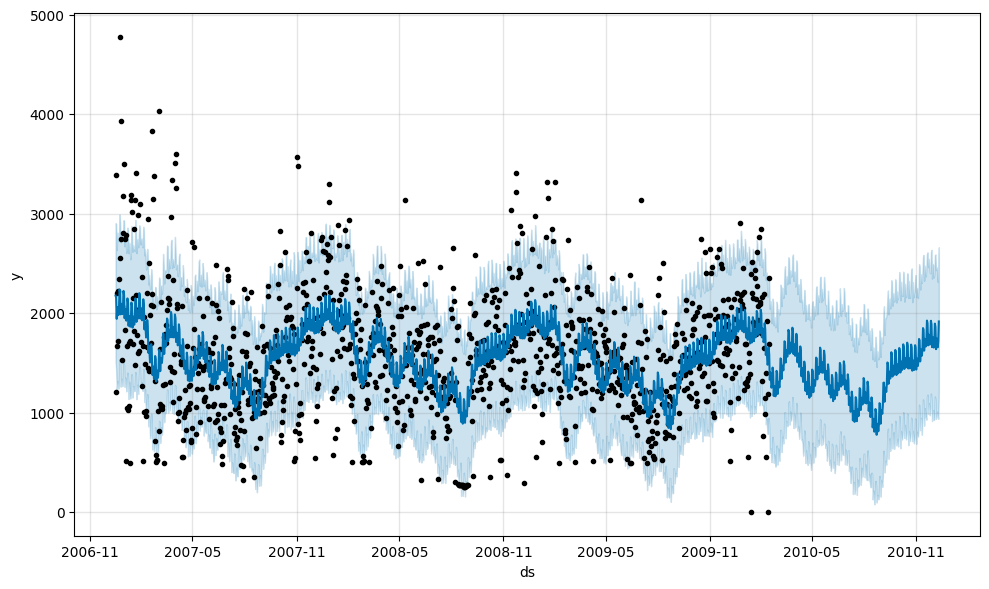

In [211]:
model = Prophet()
model.fit(train_multi)

#predict for the next 10 months
future = model.make_future_dataframe(periods=300, freq='D')
forecast_multi = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries


model.plot(forecast_multi)
plt.show()

In [212]:
forecast_multi.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1452,2010-12-07,1442.412136,965.930075,2459.884937,1441.912792,1442.869616,302.293028,302.293028,302.293028,0.967513,0.967513,0.967513,301.325515,301.325515,301.325515,0.0,0.0,0.0,1744.705164
1453,2010-12-08,1442.273190,1009.367430,2434.234583,1441.770082,1442.732628,278.541302,278.541302,278.541302,-26.016138,-26.016138,-26.016138,304.557440,304.557440,304.557440,0.0,0.0,0.0,1720.814492
1454,2010-12-09,1442.134244,972.993084,2313.057130,1441.627593,1442.595107,213.462487,213.462487,213.462487,-95.823719,-95.823719,-95.823719,309.286206,309.286206,309.286206,0.0,0.0,0.0,1655.596732
1455,2010-12-10,1441.995299,936.795400,2437.949822,1441.485930,1442.458867,271.728476,271.728476,271.728476,-43.738196,-43.738196,-43.738196,315.466672,315.466672,315.466672,0.0,0.0,0.0,1713.723774
1456,2010-12-11,1441.856353,1191.831354,2660.994637,1441.343696,1442.322028,473.414169,473.414169,473.414169,150.410291,150.410291,150.410291,323.003879,323.003879,323.003879,0.0,0.0,0.0,1915.270522


In [213]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1452,2010-12-07,1442.412136,988.490997,2439.978141,1441.932057,1442.919683,302.293028,302.293028,302.293028,0.967513,0.967513,0.967513,301.325515,301.325515,301.325515,0.0,0.0,0.0,1744.705164
1453,2010-12-08,1442.273190,957.596767,2425.382159,1441.791059,1442.783487,278.541302,278.541302,278.541302,-26.016138,-26.016138,-26.016138,304.557440,304.557440,304.557440,0.0,0.0,0.0,1720.814492
1454,2010-12-09,1442.134244,911.387502,2403.151950,1441.649738,1442.647138,213.462487,213.462487,213.462487,-95.823719,-95.823719,-95.823719,309.286206,309.286206,309.286206,0.0,0.0,0.0,1655.596732
1455,2010-12-10,1441.995299,1000.343461,2450.252081,1441.507038,1442.510704,271.728476,271.728476,271.728476,-43.738196,-43.738196,-43.738196,315.466672,315.466672,315.466672,0.0,0.0,0.0,1713.723774
1456,2010-12-11,1441.856353,1186.662565,2595.790750,1441.365139,1442.373832,473.414169,473.414169,473.414169,150.410291,150.410291,150.410291,323.003879,323.003879,323.003879,0.0,0.0,0.0,1915.270522
